EDA

Understanding the data

In [216]:
!pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport


  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [5]:
#reading data
invoiceDF = pd.read_csv('Invoices_Train.csv')
paymentsDF = pd.read_csv('Payments_Train.csv')
vendorsDF = pd.read_csv('Vendors.csv')

In [9]:
#1) how big is the data
print(invoiceDF.shape)
print(paymentsDF.shape)
print(vendorsDF.shape)

(5000, 6)
(3059, 5)
(20, 4)


In [17]:
#2) how does invoices data looks like
invoiceDF.head(5)

,Invoice_ID,Vendor_ID,Invoice_Date,Total_Amount,Currency,Status
0,INV-00001,VEND-019,2023-01-01,929.46,USD,Paid
1,INV-00002,VEND-008,2023-01-02,621.19,USD,Paid
2,INV-00003,VEND-016,2023-01-03,3375.33,USD,Paid
3,INV-00004,VEND-002,2023-01-04,4188.03,GBP,Paid
4,INV-00005,VEND-004,2023-01-05,3504.20,GBP,Pending


In [19]:
#3) how does Payments data looks like
paymentsDF.head(5)

,Payment_ID,Invoice_ID,Payment_Date,Payment_Amount,Method
0,PAY-00001,INV-00001,2023-01-02,929.46,PayPal
1,PAY-00002,INV-00002,2023-01-03,621.19,Credit Card
2,PAY-00003,INV-00003,2023-01-04,3375.33,PayPal
3,PAY-00004,INV-00004,2023-01-05,4188.03,Credit Card
4,PAY-00005,INV-00006,2023-01-06,3560.70,Credit Card


In [15]:
#3) how does Payments data looks like
vendorsDF.sample(5)

,Vendor_ID,Vendor_Name,Country,Category
12,VEND-013,Vendor_13,Germany,Logistics
17,VEND-018,Vendor_18,UK,Consulting
14,VEND-015,Vendor_15,USA,Logistics
15,VEND-016,Vendor_16,UK,Consulting
13,VEND-014,Vendor_14,USA,Consulting


In [21]:
#4)data types of colums
invoiceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice_ID    5000 non-null   object 
 1   Vendor_ID     5000 non-null   object 
 2   Invoice_Date  5000 non-null   object 
 3   Total_Amount  5000 non-null   float64
 4   Currency      5000 non-null   object 
 5   Status        5000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB


In [23]:
paymentsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Payment_ID      3059 non-null   object 
 1   Invoice_ID      3059 non-null   object 
 2   Payment_Date    3059 non-null   object 
 3   Payment_Amount  3059 non-null   float64
 4   Method          3059 non-null   object 
dtypes: float64(1), object(4)
memory usage: 119.6+ KB


In [25]:
vendorsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor_ID    20 non-null     object
 1   Vendor_Name  20 non-null     object
 2   Country      20 non-null     object
 3   Category     20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [33]:
#5) Looking for missing values
print(invoiceDF.isnull().sum())
print(paymentsDF.isnull().sum())
print(vendorsDF.isnull().sum())

Invoice_ID      0
Vendor_ID       0
Invoice_Date    0
Total_Amount    0
Currency        0
Status          0
dtype: int64
Payment_ID        0
Invoice_ID        0
Payment_Date      0
Payment_Amount    0
Method            0
dtype: int64
Vendor_ID      0
Vendor_Name    0
Country        0
Category       0
dtype: int64


In [35]:
#6)how does data looks mathamatically, this helps us in anamalies detection
invoiceDF.describe()

,Total_Amount
count,5000.000000
mean,2767.295120
std,1313.244573
min,500.380000
25%,1636.087500
50%,2745.420000
75%,3943.752500
max,4999.580000


In [37]:
paymentsDF.describe()

,Payment_Amount
count,3059.000000
mean,2775.261497
std,1308.499322
min,502.210000
25%,1648.710000
50%,2759.600000
75%,3931.455000
max,4999.580000


In [43]:
#7) finding duplicates
print(invoiceDF.duplicated().sum())
print(paymentsDF.duplicated().sum())
print(vendorsDF.duplicated().sum())


0
0
0


In [57]:
#8) identify unique values in colums that are needed
print(invoiceDF["Currency"].unique())
print(invoiceDF["Status"].unique())
print(paymentsDF["Method"].unique())
print(vendorsDF["Country"].unique())
print(vendorsDF["Category"].unique())


['USD' 'GBP' 'EUR']
['Paid' 'Pending']
['PayPal' 'Credit Card' 'Bank Transfer']
['France' 'USA' 'UK' 'Germany' 'Canada']
['Office Equipment' 'Consulting' 'Stationery' 'Logistics' 'IT Services']


After Understanding data, following are the insights :

1)all payments curruncy are diffrent, for working with this data we will need to convert this data into common curruncy.
2) no missing values are in dataset.
3) In invoice,payments dataset date is object.

Univariate Analysis:



In [83]:
import seaborn as sns
import matplotlib as plt

<Axes: xlabel='count', ylabel='Status'>

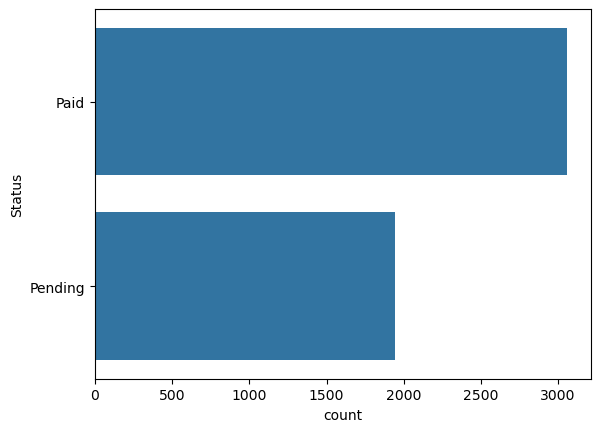

In [61]:
sns.countplot(invoiceDF['Status'])

<Axes: xlabel='count', ylabel='Country'>

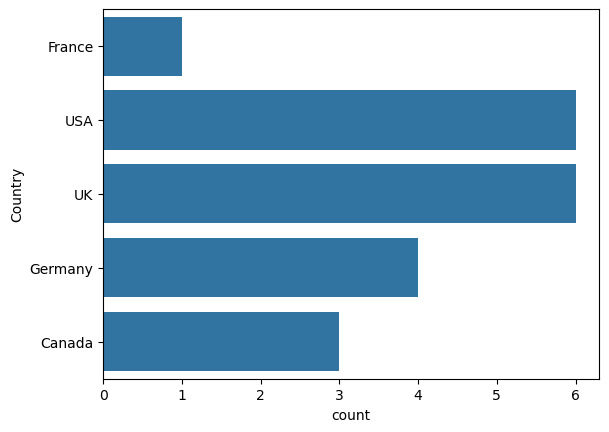

In [63]:
sns.countplot(vendorsDF['Country'])

<Axes: xlabel='count', ylabel='Method'>

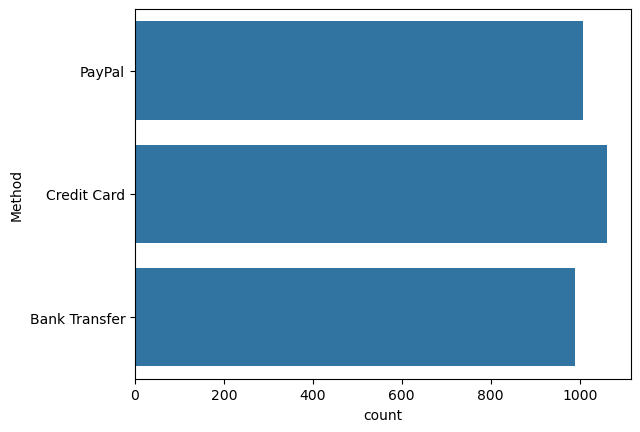

In [65]:
sns.countplot(paymentsDF['Method'])

<Axes: ylabel='count'>

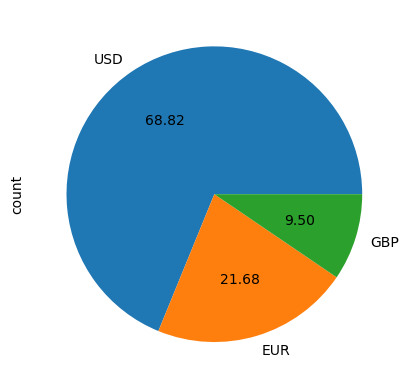

In [77]:
invoiceDF['Currency'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

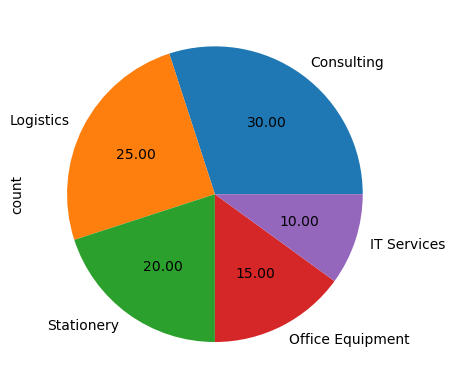

In [81]:
vendorsDF['Category'].value_counts().plot(kind='pie',autopct='%.2f')

In [218]:
From above analysis:

the toatal amount are given in diffrent curruncy which is mentioned in column curruncy.

To analyze the data we will convert all curruncy into INR

SyntaxError: invalid syntax (2277672696.py, line 1)

In [103]:
exchange_rates = {
    'USD': 82.5,  # 1 USD = 82.5 INR
    'EUR': 89.0,  # 1 EUR = 89.0 INR
    'GBP': 102.0, # 1 GBP = 102.0 INR
}

# Step 3: Add exchange rates to the DataFrame
invoiceDF['Exchange_Rate'] = invoiceDF['Currency'].map(exchange_rates)

# Step 4: Convert payments to INR
invoiceDF['Total_Amount_INR'] = invoiceDF['Total_Amount'] * invoiceDF['Exchange_Rate']

# Step 6: Save the updated DataFrame (optional)
invoiceDF.to_csv('Invoices_Train.csv', index=False)


In [105]:
invoiceDF.head()

,Invoice_ID,Vendor_ID,Invoice_Date,Total_Amount,Currency,Status,Exchange_Rate,Total_Amount_INR
0,INV-00001,VEND-019,2023-01-01,929.46,USD,Paid,82.5,76680.450
1,INV-00002,VEND-008,2023-01-02,621.19,USD,Paid,82.5,51248.175
2,INV-00003,VEND-016,2023-01-03,3375.33,USD,Paid,82.5,278464.725
3,INV-00004,VEND-002,2023-01-04,4188.03,GBP,Paid,102.0,427179.060
4,INV-00005,VEND-004,2023-01-05,3504.20,GBP,Pending,102.0,357428.400


In [107]:
# Step 3: Merge invoce data into payment data
paymentsDF = pd.merge(
    paymentsDF,
    invoiceDF[['Invoice_ID', 'Total_Amount_INR']],
    on='Invoice_ID',
    how='left'
)

# Step 4: Handle missing values
# merged_df['Payment_Amount_INR'] = merged_df['Payment_Amount_INR'].fillna(0)
paymentsDF.head()


,Payment_ID,Invoice_ID,Payment_Date,Payment_Amount,Method,Total_Amount_INR
0,PAY-00001,INV-00001,2023-01-02,929.46,PayPal,76680.450
1,PAY-00002,INV-00002,2023-01-03,621.19,Credit Card,51248.175
2,PAY-00003,INV-00003,2023-01-04,3375.33,PayPal,278464.725
3,PAY-00004,INV-00004,2023-01-05,4188.03,Credit Card,427179.060
4,PAY-00005,INV-00006,2023-01-06,3560.70,Credit Card,293757.750


In [109]:
paymentsDF = paymentsDF.rename(columns={
    'Total_Amount_INR':'Payment_Amount_INR'
})

paymentsDF.head()

,Payment_ID,Invoice_ID,Payment_Date,Payment_Amount,Method,Payment_Amount_INR
0,PAY-00001,INV-00001,2023-01-02,929.46,PayPal,76680.450
1,PAY-00002,INV-00002,2023-01-03,621.19,Credit Card,51248.175
2,PAY-00003,INV-00003,2023-01-04,3375.33,PayPal,278464.725
3,PAY-00004,INV-00004,2023-01-05,4188.03,Credit Card,427179.060
4,PAY-00005,INV-00006,2023-01-06,3560.70,Credit Card,293757.750


Bivariate And Multivariate analysis

<Axes: ylabel='Total_Amount_INR'>

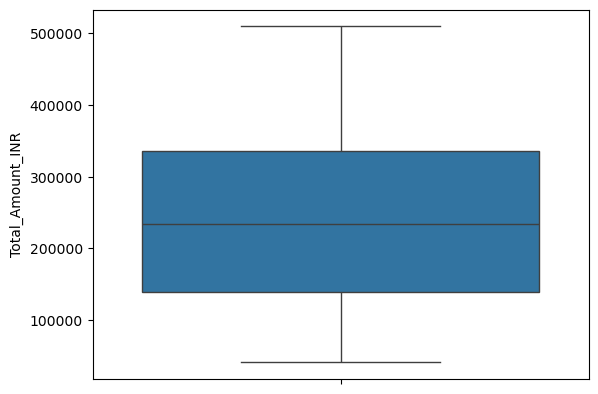

In [117]:
sns.boxplot(invoiceDF['Total_Amount_INR'])

<Axes: ylabel='Invoice_Date'>

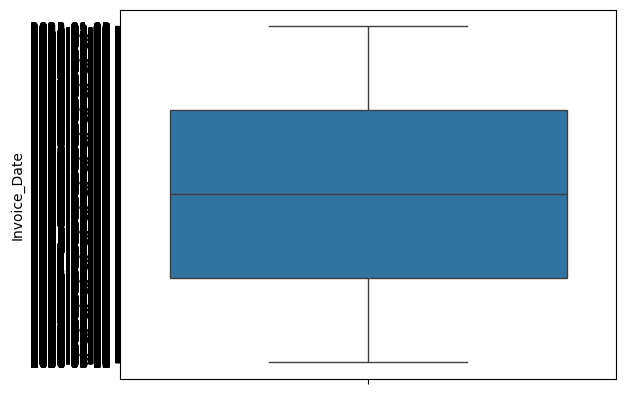

In [146]:
sns.boxplot(invoiceDF['Invoice_Date'])

pandas profiling 

In [139]:
# !pip uninstall pandas-profiling
!pip install ydata-profiling

In [222]:
from ydata_profiling import ProfileReport

# Generate the profile report
prof = ProfileReport(invoiceDF)

# Save the report to an HTML file (optional)
prof.to_file("invoice_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]